In [1]:
# Random Forest Classification
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
company_df=pd.read_csv("Company_Data.csv")

In [3]:
company_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
company_df[company_df.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


<AxesSubplot:>

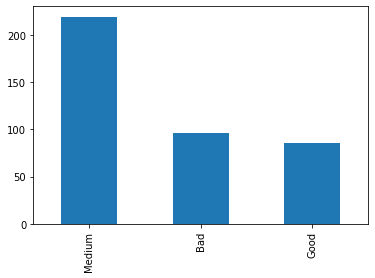

In [6]:
company_df.ShelveLoc.value_counts().plot(kind="bar")

<AxesSubplot:>

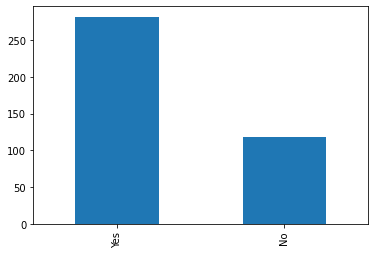

In [7]:
company_df.Urban.value_counts().plot(kind="bar")

In [8]:
#Encoding few columns in the dataframe
label_encoder = preprocessing.LabelEncoder()
company_df['ShelveLoc']=label_encoder.fit_transform(company_df['ShelveLoc'])
company_df['Urban']=label_encoder.fit_transform(company_df['Urban'])
company_df['US']=label_encoder.fit_transform(company_df['US'])

{'whiskers': [<matplotlib.lines.Line2D at 0x161f0206220>,
 'caps': [<matplotlib.lines.Line2D at 0x161f0206880>,
 'boxes': [<matplotlib.lines.Line2D at 0x161f01f2d90>],
 'medians': [<matplotlib.lines.Line2D at 0x161f0206fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x161f0213370>],
 'means': []}

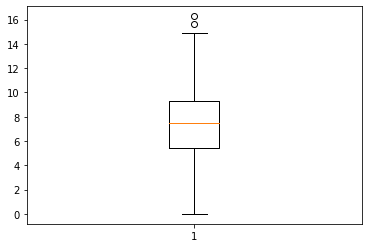

In [9]:
plt.boxplot(company_df['Sales'],vert = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x161f027d700>,
 'caps': [<matplotlib.lines.Line2D at 0x161f027de20>,
 'boxes': [<matplotlib.lines.Line2D at 0x161f027d370>],
 'medians': [<matplotlib.lines.Line2D at 0x161f0288580>],
 'fliers': [<matplotlib.lines.Line2D at 0x161f0288910>],
 'means': []}

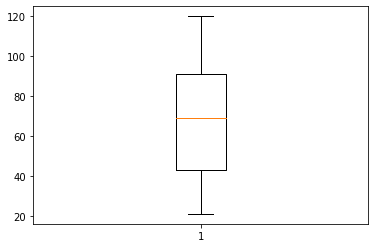

In [10]:
plt.boxplot(company_df['Income'],vert = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x161f02e6370>,
 'caps': [<matplotlib.lines.Line2D at 0x161f02e6a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x161f02d8fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x161f02f21f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x161f02f2580>],
 'means': []}

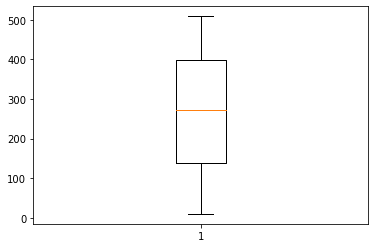

In [11]:
plt.boxplot(company_df['Population'],vert = True)

In [12]:
# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(company_df)

IsolationForest(contamination=0.01, random_state=10)

In [13]:
# predictions
y_pred_outliers = clf.predict(company_df)

In [14]:
#-1 for outliers and 1 for inliers.
y_pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [15]:
company_df['Outliers']=y_pred_outliers # to assign a separate Outliers column 

In [16]:
company_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Outliers
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,1
397,7.41,162,26,12,368,159,2,40,18,1,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1,1


In [17]:
company_df[company_df.Outliers==-1] # to display the rows which has outliers

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Outliers
42,10.43,77,69,0,25,24,2,50,18,1,0,-1
75,8.55,88,111,23,480,92,0,36,16,0,1,-1
174,0.00,139,24,0,358,185,2,79,15,0,0,-1
367,14.37,95,106,0,256,53,1,52,17,1,0,-1


In [18]:
Msales=company_df.Sales.mean()
Msales


7.496325

(array([ 22., 130., 168.,  69.,  11.]),
 array([ 0.   ,  3.254,  6.508,  9.762, 13.016, 16.27 ]),
 <BarContainer object of 5 artists>)

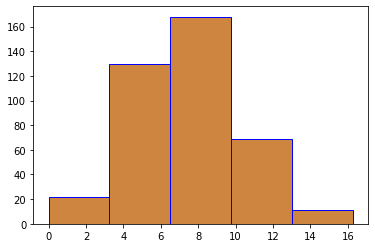

In [19]:
plt.hist(company_df['Sales'],facecolor ="peru",edgecolor ="blue",bins =5)

In [20]:
row=(42,75,174,367)
for i in row:
    company_df.drop(i,axis=0,inplace=True)

In [21]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        396 non-null    float64
 1   CompPrice    396 non-null    int64  
 2   Income       396 non-null    int64  
 3   Advertising  396 non-null    int64  
 4   Population   396 non-null    int64  
 5   Price        396 non-null    int64  
 6   ShelveLoc    396 non-null    int32  
 7   Age          396 non-null    int64  
 8   Education    396 non-null    int64  
 9   Urban        396 non-null    int32  
 10  US           396 non-null    int32  
 11  Outliers     396 non-null    int32  
dtypes: float64(1), int32(4), int64(7)
memory usage: 34.0 KB


In [22]:
userindex = company_df.index[company_df['Sales'] >= 10]
company_df.loc[userindex, ["DefinedSales"]] = "High"

userindex2=company_df.index[company_df['Sales'] <5]
company_df.loc[userindex2, ["DefinedSales"]] = "Low"


In [23]:
pd.set_option('display.max_rows', None)

company_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Outliers,DefinedSales
0,9.50,138,73,11,276,120,0,42,17,1,1,1,NaN
1,11.22,111,48,16,260,83,1,65,10,1,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,1,NaN
4,4.15,141,64,3,340,128,0,38,13,1,0,1,Low
5,10.81,124,113,13,501,72,0,78,16,0,1,1,High
6,6.63,115,105,0,45,108,2,71,15,1,0,1,NaN
7,11.85,136,81,15,425,120,1,67,10,1,1,1,High
8,6.54,132,110,0,108,124,2,76,10,0,0,1,NaN
9,4.69,132,113,0,131,124,2,76,17,0,1,1,Low


In [24]:
company_df.fillna('Medium')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Outliers,DefinedSales
0,9.50,138,73,11,276,120,0,42,17,1,1,1,Medium
1,11.22,111,48,16,260,83,1,65,10,1,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,1,Medium
4,4.15,141,64,3,340,128,0,38,13,1,0,1,Low
5,10.81,124,113,13,501,72,0,78,16,0,1,1,High
6,6.63,115,105,0,45,108,2,71,15,1,0,1,Medium
7,11.85,136,81,15,425,120,1,67,10,1,1,1,High
8,6.54,132,110,0,108,124,2,76,10,0,0,1,Medium
9,4.69,132,113,0,131,124,2,76,17,0,1,1,Low


In [25]:
company_df['DefinedSales']=label_encoder.fit_transform(company_df['DefinedSales'])

In [26]:
company_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Outliers,DefinedSales
0,9.50,138,73,11,276,120,0,42,17,1,1,1,2
1,11.22,111,48,16,260,83,1,65,10,1,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1,2
4,4.15,141,64,3,340,128,0,38,13,1,0,1,1


In [27]:
#Random Forest Classifier
array = company_df.values
X = array[:,1:11]
Y = array[:,-1]
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7, shuffle = True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean()) 

0.6923717948717949


In [28]:
# Stacking Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


array = company_df.values
X = array[:,1:11]
Y = array[:,-1]
kfold = KFold(n_splits=10, random_state=7, shuffle = True)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = RandomForestClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.6898076923076923


In [29]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

array = company_df.values
X = array[:,1:11]
Y = array[:,-1]

num_trees = 100
seed=7
kfold = KFold(n_splits=10, random_state=seed, shuffle = True )
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.743076923076923


In [30]:
# Bagged Decision Trees for Classification

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

array = company_df.values
X = array[:,1:11]
Y = array[:,-1]
seed = 7

kfold = KFold(n_splits=10, random_state=seed,shuffle = True)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean()) 

0.7100641025641025


In [31]:
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=42)


In [32]:
# fit model on training data
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=4,n_estimators=500,gamma=0.65,max_leaves=2,learning_rate=.7)

model.fit(x_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.65, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.7, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=2, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [33]:
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [34]:
# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.25%
